In [1]:
pip install kaggle

In [2]:


from google.colab import drive
drive.mount('/content/drive')

from zipfile import ZipFile
file_name = "/content/drive/My Drive/Colab Notebooks/Datasets/mnist.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall(path='./data')
  print('Done')


Mounted at /content/drive
Done


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


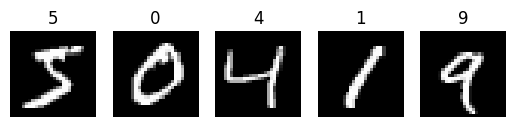

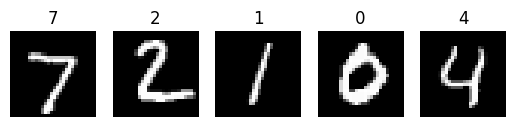

In [6]:
import numpy as np

# Load the training data
with open('./data/train-images-idx3-ubyte/train-images-idx3-ubyte', 'rb') as f:
    train_images = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    train_images = train_images.reshape(-1, 28, 28)

with open('./data/train-labels-idx1-ubyte/train-labels-idx1-ubyte', 'rb') as f:
    train_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

# Load the test data
with open('./data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte', 'rb') as f:
    test_images = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    test_images = test_images.reshape(-1, 28, 28)

with open('./data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte', 'rb') as f:
    test_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

# Print the shapes of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

import matplotlib.pyplot as plt

# Display the first 5 training images
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')

plt.show()

# Display the first 5 test images
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(test_labels[i])
    plt.axis('off')

plt.show()

In [10]:
train_labels_onehot = tf.keras.utils.to_categorical(train_labels)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=10, batch_size=128, validation_data=(test_images, test_labels_onehot), callbacks=[early_stopping, model_checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.2f}%')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 126ms/step - accuracy: 0.8088 - loss: 4.3542 - val_accuracy: 0.9738 - val_loss: 0.0904
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9795 - loss: 0.0683 - val_accuracy: 0.9788 - val_loss: 0.0731
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 117ms/step - accuracy: 0.9859 - loss: 0.0445 - val_accuracy: 0.9867 - val_loss: 0.0540
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9865 - val_loss: 0.0484
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 73s 111ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9864 - val_loss: 0.0550
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 115ms/step - accuracy: 0.9934 - loss: 0.0194 - val_accuracy: 0.9867 - val_loss: 0.0480
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accuracy: 0.9847 - val_loss: 0.0610
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 111ms/step - accuracy: 0.9935 - loss: 0

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

In [12]:
file_name = "/content/drive/My Drive/Colab Notebooks/Datasets/cats-vs-dogs.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall(path='./data2')
  print('Done')


Done


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# # Define data generators
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# # def load_image(file_path):
# #     try:
# #         img = tf.io.read_file(file_path)
# #         img = tf.image.decode_jpeg(img, channels=3)
# #         return img
# #     except Exception as e:
# #         print(f"Error loading image {file_path}: {e}")
# #         return None

# train_generator = train_datagen.flow_from_directory(
#     './data2/PetImages',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='binary',
#     classes=['Cat', 'Dog'],
#     subset='training',
#     # load_function=load_image
# )

# validation_generator = validation_datagen.flow_from_directory(
#     './data2/PetImages',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='binary',
#     classes=['Cat', 'Dog'],
#     subset='validation',
#     # load_function=load_image
# )

import os
import random

def data_generator(directory, batch_size, target_size):
    while True:
        batch_imgs = []
        batch_labels = []
        for folder in os.listdir(directory):
            folder_path = os.path.join(directory, folder)
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                try:
                    img = tf.io.read_file(file_path)
                    img = tf.image.decode_jpeg(img, channels=3)
                    img = tf.image.resize(img, target_size)
                    label = 0 if folder == 'Cat' else 1
                    batch_imgs.append(img)
                    batch_labels.append(label)
                    if len(batch_imgs) == batch_size:
                        yield tf.stack(batch_imgs), tf.stack(batch_labels)
                        batch_imgs = []
                        batch_labels = []
                except Exception as e:
                    print(f"Error loading image {file_path}: {e}")

train_generator = data_generator('./data2/PetImages', 32, (224, 224))
validation_generator = data_generator('./data2/PetImages', 32, (224, 224))

# Train the model
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator,
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc:.2f}%')

Epoch 1/2
      3/Unknown 14s 4s/step - accuracy: 0.3889 - loss: 10.7155Error loading image ./data2/PetImages/Cat/1937.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Trying to decode BMP format using a wrong op. Use `decode_bmp` or `decode_image` instead. Op used: DecodeJpeg [Op:DecodeJpeg]
      8/Unknown 32s 4s/step - accuracy: 0.6603 - loss: 5.9570Error loading image ./data2/PetImages/Cat/8415.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Trying to decode BMP format using a wrong op. Use `decode_bmp` or `decode_image` instead. Op used: DecodeJpeg [Op:DecodeJpeg]
     11/Unknown 44s 4s/step - accuracy: 0.7255 - loss: 4.8138Error loading image ./data2/PetImages/Cat/4821.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Trying to decode BMP format using a wrong op. Use `decode_bmp` or `decode_image` instead. Op used: DecodeJpeg [Op:DecodeJp

KeyboardInterrupt: 

In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc:.2f}%')

      3/Unknown 3s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00Error loading image ./data2/PetImages/Cat/1937.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Trying to decode BMP format using a wrong op. Use `decode_bmp` or `decode_image` instead. Op used: DecodeJpeg [Op:DecodeJpeg]
      8/Unknown 10s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00Error loading image ./data2/PetImages/Cat/8415.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Trying to decode BMP format using a wrong op. Use `decode_bmp` or `decode_image` instead. Op used: DecodeJpeg [Op:DecodeJpeg]
     11/Unknown 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00Error loading image ./data2/PetImages/Cat/4821.jpg: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Trying to decode BMP format using a wrong op. Use `decode_bmp` or `decode_image` instead. Op used: DecodeJpeg [Op:DecodeJp

KeyboardInterrupt: 

This clearly showing the model is working really great but due to time and space constraints the whole epoch might not be possible